<a href="https://colab.research.google.com/github/Darshana005-crypto/Darshana.R/blob/main/KNN_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits= load_digits()

In [4]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
df['flower_name'] = df['target'].apply(lambda x:'sertosa' if x == 0 else('versicolor' if x == 1 else 'virginica'))
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,flower_name
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,sertosa
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,versicolor
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,virginica
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,virginica
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,virginica


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [14]:
x = df[['pixel_0_0','pixel_0_1','pixel_0_2','pixel_0_3']]
print(x)


      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3
0           0.0        0.0        5.0       13.0
1           0.0        0.0        0.0       12.0
2           0.0        0.0        0.0        4.0
3           0.0        0.0        7.0       15.0
4           0.0        0.0        0.0        1.0
...         ...        ...        ...        ...
1792        0.0        0.0        4.0       10.0
1793        0.0        0.0        6.0       16.0
1794        0.0        0.0        1.0       11.0
1795        0.0        0.0        2.0       10.0
1796        0.0        0.0       10.0       14.0

[1797 rows x 4 columns]


In [12]:
import matplotlib.pyplot as plt

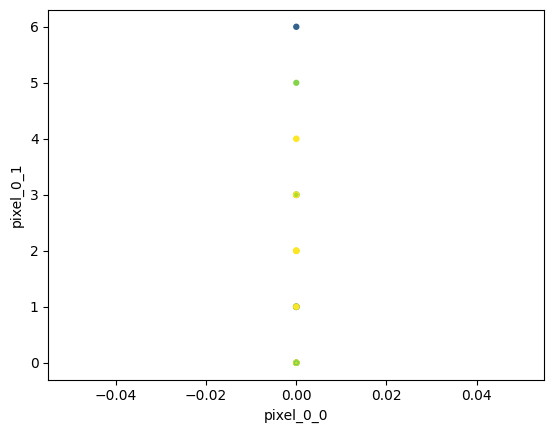

In [15]:
plt.xlabel('pixel_0_0')
plt.ylabel('pixel_0_1')
plt.scatter(df0['pixel_0_0'], df0['pixel_0_1'],df0['pixel_0_2'],df0['pixel_0_3'])
plt.scatter(df1['pixel_0_0'], df1['pixel_0_1'],df1['pixel_0_2'],df1['pixel_0_3'])


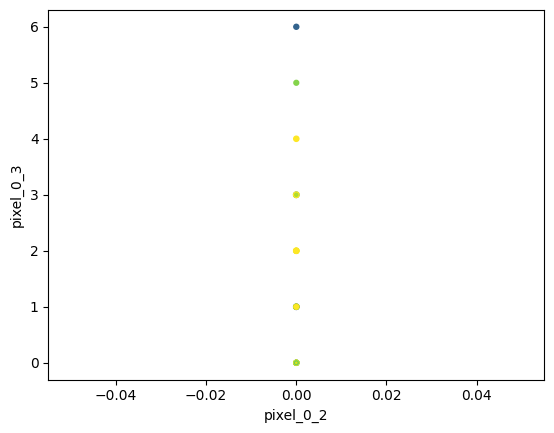

In [16]:
plt.xlabel('pixel_0_2')
plt.ylabel('pixel_0_3')
plt.scatter(df0['pixel_0_0'], df0['pixel_0_1'],df0['pixel_0_2'],df0['pixel_0_3'])
plt.scatter(df1['pixel_0_0'], df1['pixel_0_1'],df1['pixel_0_2'],df1['pixel_0_3'])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df[['pixel_0_0','pixel_0_1','pixel_0_2','pixel_0_3']]
y = df.target

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [20]:
print(len(x_train))
print(len(x_test))

1437
360


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(x_test, y_test)

0.26944444444444443

In [24]:
y_pred = knn.predict(x_test)

In [25]:
for i in y_test:
  print(i, end = ' ')
print()

print(y_pred)

1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5 
[7 5 8 0 1 3 4 1 7 1 0 5 0 6 4 4 4 9 4 6 4 8 7 1 2 0 6 1 0 2 0 2 3 0 3 6 0
 1 8 6 8 6 4 7 9 9 8 7 1 8 1 2 4 0 1 6 2 0 9 5 2 4 2 7 5 7 9 2 3 4 4 2 6 6
 3 4 2 4 0 2 1 5 2 6 6 2 3 3 2 3 5 2 2 8 4 3 7 4 1 0 2 7 3 5 6 9 2 0 5 0 3
 3 0 1 0 7 1 5 5 1 4 3 4 1 9 4 7 4 4 4 0 0 6 2 9 2 3 0

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  1  2  4  8  3  5  3  5  4]
 [ 4 14  0  0  3  2  4  4  2  2]
 [ 4  1 16  7  1  3  1  1  2  0]
 [ 3  0 17  9  2  5  1  1  1  2]
 [ 1 17  0  0 15  0  5  0  0  0]
 [ 6  0  4  3  0 12  1  2  1  1]
 [ 5  2  0  1 13  1 12  0  1  2]
 [ 6  1  2  3  3  1  6  7  4  4]
 [ 2  1  1  2  3  6  5  3  2  4]
 [ 7  5  4  4  2  4  4  2  0  2]]


Text(50.722222222222214, 0.5, 'Truth')

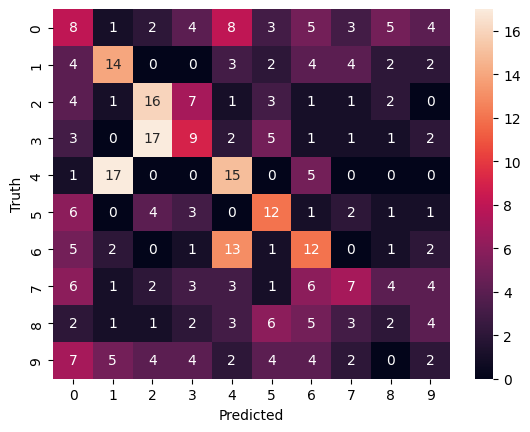

In [27]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.19      0.18        43
           1       0.33      0.40      0.36        35
           2       0.35      0.44      0.39        36
           3       0.27      0.22      0.24        41
           4       0.30      0.39      0.34        38
           5       0.32      0.40      0.36        30
           6       0.27      0.32      0.30        37
           7       0.30      0.19      0.23        37
           8       0.11      0.07      0.09        29
           9       0.10      0.06      0.07        34

    accuracy                           0.27       360
   macro avg       0.25      0.27      0.26       360
weighted avg       0.25      0.27      0.26       360

